In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
survey_df = pd.read_csv("C:/Users/akash/EDA/survey_results_public.csv")
schema_df = pd.read_csv("C:/Users/akash/EDA/survey_results_schema.csv",index_col="Column").QuestionText

In [3]:

#pd.set_option('display.max_column', None)
#pd.set_option('display.max_colwidth', None)

In [4]:
print(schema_df)

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object


In [5]:
schema_df[['Age','Gender']]

Column
Age       What is your age (in years)? If you prefer not...
Gender    Which of the following describe you, if any? P...
Name: QuestionText, dtype: object

In [6]:
selected_columns=['Country','Age','Gender','EdLevel','UndergradMajor','Hobbyist','Age1stCode','YearsCode','YearsCodePro','LanguageDesireNextYear','LanguageWorkedWith','NEWLearn','NEWStuck','Employment','DevType','WorkWeekHrs','JobSat','JobFactors','NEWOvertime','NEWEdImpt']

In [7]:
len(selected_columns)

20

In [8]:
survey_df.head(100)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,I am a developer by profession,Yes,30.0,13,Yearly,100000.0,75631.0,Canada,Canadian dollar,...,Easy,Appropriate in length,Yes,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,35.0,17,4
96,98,I am a developer by profession,No,29.0,15,Monthly,80000.0,41568.0,Czech Republic,Czech koruna,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,10,5
97,99,I am a developer by profession,Yes,30.0,7,Yearly,105000.0,79413.0,Canada,Canadian dollar,...,Easy,Appropriate in length,NaN,"Computer science, computer engineering, or sof...",NaN,React.js,A lot less welcome now than last year,40.0,15,9
98,100,I am a developer by profession,Yes,42.0,8,Yearly,93000.0,93000.0,United States,United States dollar,...,Easy,Appropriate in length,No,Web development or web design,jQuery,Angular.js;ASP.NET;ASP.NET Core;jQuery,Just as welcome now as I felt last year,32.0,27,11


In [9]:
df=survey_df[selected_columns].copy()


In [10]:
df.iloc[0:30]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageDesireNextYear,LanguageWorkedWith,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,Python;Swift,JavaScript;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
5,Germany,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,No,14,6,4,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,Once a year,Play games;Visit Stack Overflow;Watch help / t...,Employed full-time,"Designer;Developer, front-end;Developer, mobile",NaN,Slightly satisfied,Diversity of the company or organization;Langu...,Never,Fairly important
6,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18,6,4,C#;HTML/CSS;PHP,C#;HTML/CSS;PHP,Every few months,NaN,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Very satisfied,NaN,Sometimes: 1-2 days per month but less than we...,Very important
7,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12,17,13,JavaScript,Python;SQL,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",39.0,Slightly dissatisfied,Remote work options;Opportunities for professi...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
8,Tunisia,30.0,Man,"Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",No,20,6,4,Python;Rust,HTML/CSS;JavaScript;PHP,Once a year,Meditate,"Independent contractor, freelancer, or self-em...","Developer, full-stack",50.0,Very dissatisfied,Diversity of the company or organization;Remot...,Occasionally: 1-2 days per quarter but less th...,Very important
9,United Kingdom,22.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,14,8,4,HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Java;JavaScript;Python;SQL,Every few months,Visit Stack Overflow,Employed full-time,"Database administrator;Developer, full-stack;D...",36.0,Very satisfied,Flex time or a flexible schedule;How widely us...,Often: 1-2 days per week or more,Fairly important


In [11]:
df.shape

(64461, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageDesireNextYear  54113 non-null  object 
 10  LanguageWorkedWith      57378 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [13]:
df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [14]:
df['Age1stCode']=pd.to_numeric(df.Age1stCode , errors= "coerce")
df['YearsCode']=pd.to_numeric(df.YearsCode , errors= "coerce")
df['YearsCodePro']=pd.to_numeric(df.YearsCodePro , errors= "coerce")

In [15]:
df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [16]:
df.drop(df[df.Age<10].index,inplace=True)
df.drop(df[df.Age>100].index,inplace=True)
df.drop(df[df.WorkWeekHrs>140].index,inplace=True)

In [17]:
df['Gender'].unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [18]:
df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [19]:
condition = df['Gender'].str.contains(';').astype(bool)

# Apply the ~ operator to the boolean array and perform the replacement
df['Gender'] = np.where(condition, np.nan, df['Gender'])

survey_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [20]:
df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageDesireNextYear,LanguageWorkedWith,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
18392,United Kingdom,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,7.0,39.0,24.0,C#;HTML/CSS;JavaScript;SQL;TypeScript,C#;HTML/CSS;JavaScript;SQL;TypeScript,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Database administrator;Designer;Developer, bac...",40.0,Slightly satisfied,"Industry that I’d be working in;Languages, fra...",Sometimes: 1-2 days per month but less than we...,Very important
47985,South Africa,47.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,28.0,15.0,8.0,Dart;HTML/CSS;SQL;Swift,Dart;HTML/CSS;Swift,Once a year,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Academic researcher;Designer;Developer, front-...",40.0,Neither satisfied nor dissatisfied,How widely used or impactful my work output wo...,Sometimes: 1-2 days per month but less than we...,Fairly important
50183,United States,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,8.0,4.0,Assembly;Bash/Shell/PowerShell;C;Go;Python;Rus...,Assembly;Bash/Shell/PowerShell;C;Go;HTML/CSS;J...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end",40.0,Very satisfied,How widely used or impactful my work output wo...,Sometimes: 1-2 days per month but less than we...,Very important
9379,Sri Lanka,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,20.0,5.0,NaN,C;C#;Dart;HTML/CSS;Java;JavaScript;Kotlin;Pyth...,C;C#;HTML/CSS;Java;JavaScript;PHP;SQL;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Student,NaN,NaN,NaN,Industry that I’d be working in;Flex time or a...,NaN,NaN
501,United States,34.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,13.0,13.0,Objective-C;Swift,Bash/Shell/PowerShell;C#;Dart;Java;Kotlin,Once a year,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Academic researcher;Developer, full-stack;Deve...",40.0,Very satisfied,Diversity of the company or organization;Flex ...,Occasionally: 1-2 days per quarter but less th...,Very important
32431,Germany,NaN,NaN,"Secondary school (e.g. American high school, G...",NaN,Yes,9.0,8.0,NaN,Assembly;Bash/Shell/PowerShell;Go;Rust,HTML/CSS;Java;JavaScript;SQL;TypeScript,Every few months,Visit Stack Overflow;Do other work and come ba...,Student,NaN,NaN,NaN,Flex time or a flexible schedule;Specific depa...,NaN,NaN
8033,Iran,30.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,15.0,6.0,4.0,JavaScript,Bash/Shell/PowerShell;C;C++;Python,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
29842,Slovenia,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,14.0,8.0,NaN,JavaScript;Python;Rust;TypeScript,Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...,Every few months,Play games;Visit Stack Overflow;Go for a walk ...,Student,NaN,NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN
14945,Iran,34.0,Man,Some college/university study without earning ...,"Another engineering discipline (such as civil,...",Yes,19.0,7.0,5.0,Go;Java;Kotlin;Rust;Scala,Go;Java;SQL,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Data scientist or machine learning specialist;...,46.0,

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [22]:
schema_df.Country


'Where do you live?'

In [23]:
df.Country.nunique()

183

In [24]:
top_country = df.Country.value_counts().head(15)
top_country


Country
United States         12468
India                  8393
United Kingdom         3894
Germany                3879
Canada                 2189
France                 1893
Brazil                 1811
Netherlands            1340
Poland                 1263
Australia              1208
Spain                  1160
Italy                  1115
Russian Federation     1091
Sweden                  884
Pakistan                808
Name: count, dtype: int64

C:\Users\akash\anaconda3\envs\cuda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akash\anaconda3\envs\cuda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akash\anaconda3\envs\cuda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


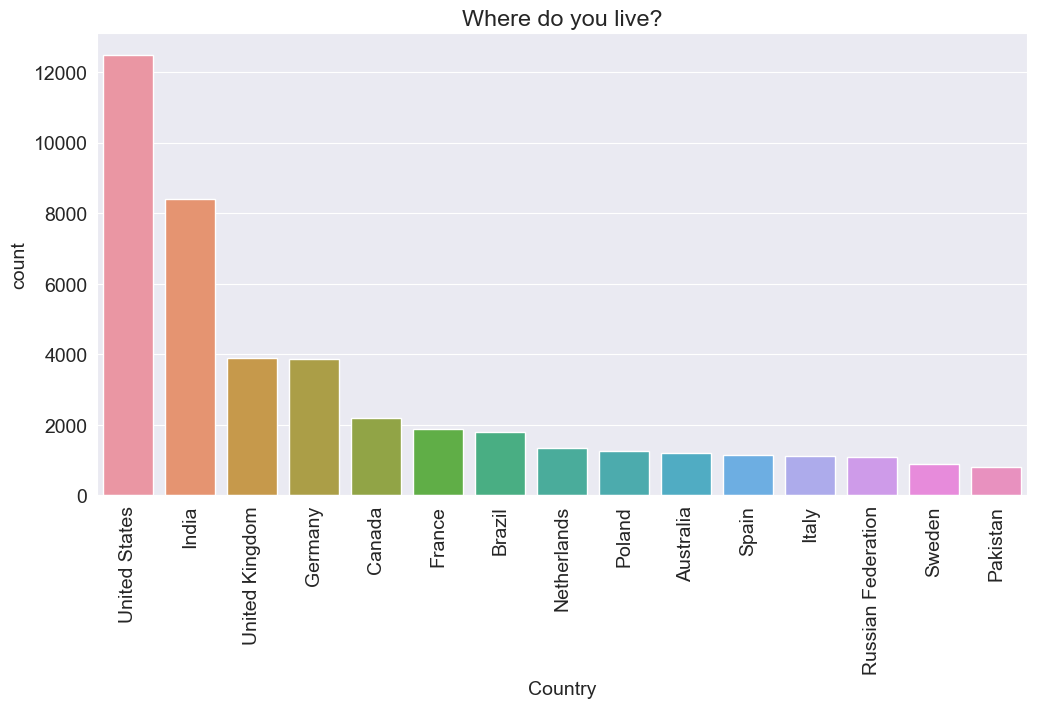

In [25]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title(schema_df.Country)
sns.barplot(x=top_country.index, y=top_country);

(array([  210.,  2440.,  9196., 12016.,  8781.,  5607.,  3041.,  1763.,
         1039.,   623.,   334.,   144.,    75.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
        75.]),
 <BarContainer object of 13 artists>)

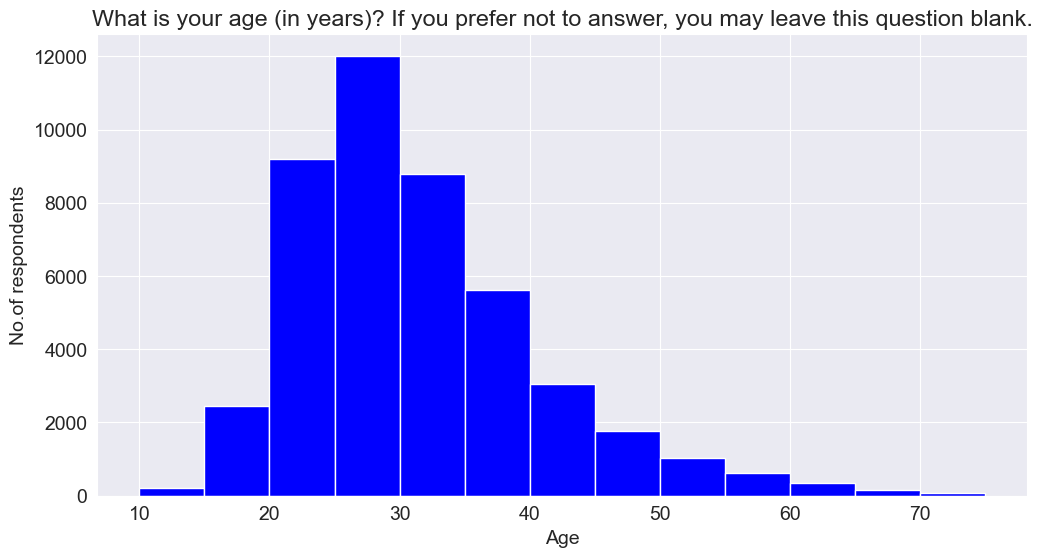

In [26]:
plt.figure(figsize=(12,6))
plt.xlabel('Age')
plt.ylabel('No.of respondents')
plt.title(schema_df.Age)
plt.hist(df.Age , bins = np.arange(10,80,5) ,color= 'blue')

In [27]:
gender_counts = df.Gender.value_counts(dropna=True)
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x20674b9e8d0>,
 [Text(1.0617335815722195, -0.28761398047005127, 'Man'),
  Text(-1.0544835403587842, 0.3131524598536697, 'Woman'),
  Text(-1.0996796455244597, 0.026545757084685317, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(0.5791274081303015, -0.1568803529836643, '91.6%'),
  Text(-0.5751728401957005, 0.17081043264745616, '7.7%'),
  Text(-0.5998252611951598, 0.014479503864373808, '0.8%')])

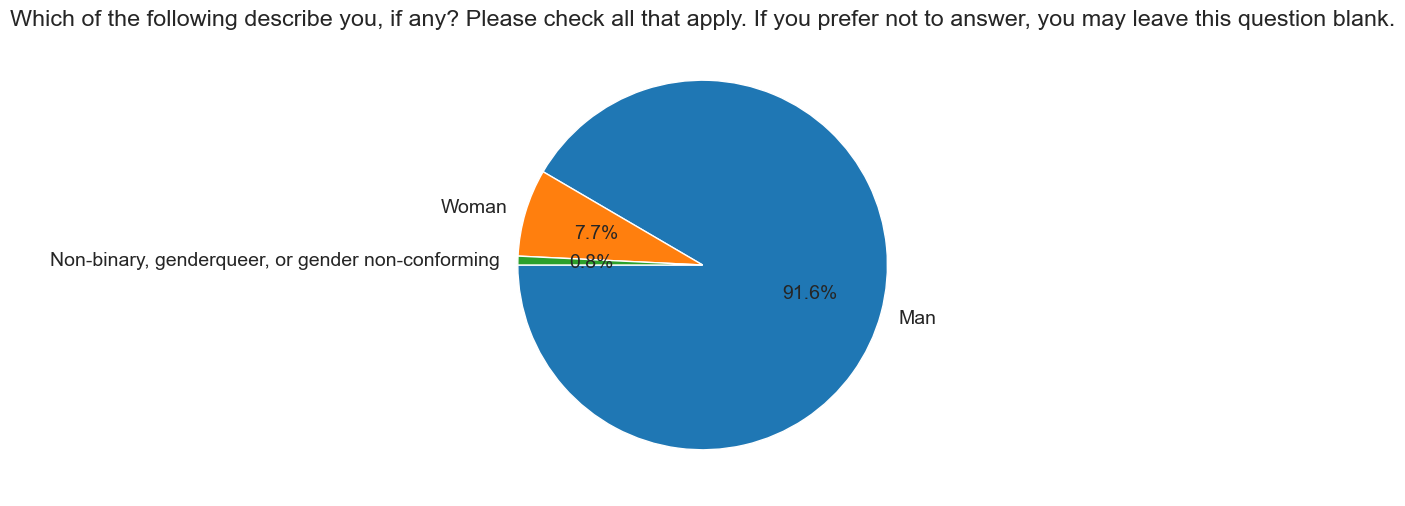

In [28]:
plt.figure(figsize=(12,6))
plt.title(schema_df.Gender)
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=180)

In [29]:


df.EdLevel.count()

57280

C:\Users\akash\anaconda3\envs\cuda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akash\anaconda3\envs\cuda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akash\anaconda3\envs\cuda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 1.0, 'Which of the following best describes the highest level of formal education that you’ve completed?')

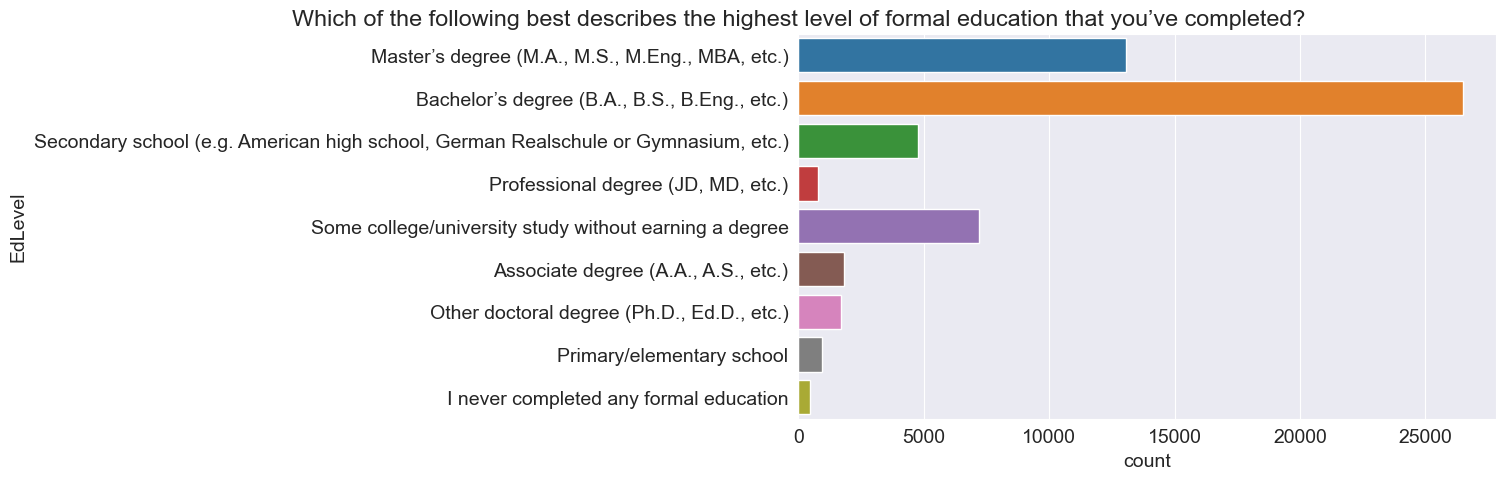

In [30]:
sns.countplot(y=df.EdLevel)
plt.title(schema_df['EdLevel'],x=0)


In [32]:
schema_df.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'